# Programming Projects

**Names:**

**Vamshi Jaligama**


In [25]:
! env TZ=America/Detroit date

Mon Dec 12 04:24:52 EST 2022


# Programming Project

Develop a demonstration for multidimensional rule association mining.

**Data Mining:** It is the process of discovering interesting patterns and
knowledge from large amounts of data. The data sources can include databases, datawarehouses, the Web, other information repositories, or data that are streamed into the system dynamically.

Imagine that you are a supervisor at Food Court, and you are talking to a customer who
recently ate Pizza and a Pasta from the Food Court. What should you recommend
to her next? Information about which food items are frequently consumed by your customer following their eating habits would be
very helpful in making your recommendation. Frequent patterns and association rules are the knowledge that you want to mine in such a scenario.

Frequent itemset mining leads to the discovery of associations and correlations among
items in large transactional or relational data sets. With massive amounts of data contin-
uously being collected and stored, many industries are becoming interested in mining
such patterns from their databases. The discovery of interesting correlation relation-
ships among huge amounts of business transaction records can help in many busi-
ness decision-making processes such as catalog design, cross-marketing, and customer
shopping behavior analysis.

For example, the information that customers who ate Ice Cream also tend
to eat Brownie at the same time is represented in the following association
rule:
**Ice Cream ⇒ Brownie [support = 2%, confidence = 60%]**

**Rule support** and **confidence** are two measures of rule interestingness. They respec-
tively reflect the usefulness and certainty of discovered rules. A support of 2% for above rule means that 2% of all the food habits under analysis show that Ice Cream
and Brownies are consumed together. A confidence of 60% means that 60% of
the customers who consumed Ice Cream also consumed Brownie. Typically, associa-
tion rules are considered interesting if they satisfy both a minimum support threshold
and a minimum confidence threshold. 

**Frequent Itemsets, Closed Itemsets, and Association Rules**

support (A⇒B) =P(A ∪ B)

confidence (A⇒B) =P(B|A)

Rules that satisfy both a minimum support threshold (min sup) and a minimum con-
fidence threshold (min conf ) are called strong.


Patterns or association rules
may have items or concepts residing at high, low, or multiple abstraction levels. For
example, suppose that a set of association rules mined includes the following rules
where X is a variable representing a customer:
buys(X, “computer”) ⇒ buys(X, “printer ”)
buys(X, “laptop computer”) ⇒ buys(X, “color laser printer ”)
In Rules and , the items bought are referenced at different abstraction levels
(e.g., “computer” is a higher-level abstraction of “laptop computer,” and “color laser
printer” is a lower-level abstraction of “printer”). We refer to the rule set mined as
consisting of multilevel association rules.

If a rule/pattern references two or more dimensions, such as age, diet, and buys,
then it is a multidimensional association rule/pattern. The following is an example
of a multidimensional rule:
age(X, “20 . . . 29”) ∧ diet(X, “Intermittent ...Keto...Veganism ”) ⇒ buys(X, “brownie”). 

Techniques for mining multidimensional association rules can be
categorized into two basic approaches regarding the treatment of quantitative attributes.
In the first approach, quantitative attributes are discretized using predefined concept
hierarchies. This discretization occurs before mining. For instance, a concept hierarchy
for income may be used to replace the original numeric values of this attribute by inter-
val labels such as “0..20K,” “21K..30K,” “31K..40K,” and so on. Here, discretization is
static and predetermined. Chapter 3 on data preprocessing gave several techniques for
discretizing numeric attributes. The discretized numeric attributes, with their interval
labels, can then be treated as nominal attributes (where each interval is considered a
category). We refer to this as mining multidimensional association rules using static
discretization of quantitative attributes.
In the second approach, quantitative attributes are discretized or clustered into “bins”
based on the data distribution. These bins may be further combined during the mining
process. The discretization process is dynamic and established so as to satisfy some min-
ing criteria such as maximizing the confidence of the rules mined. Because this strategy
treats the numeric attribute values as quantities rather than as predefined ranges or cat-
egories, association rules mined from this approach are also referred to as (dynamic)
quantitative association rules.

In multidimensional association rule mining we search for frequent predicate sets. A k-predicate set is a set containing k conjunctive predicates.

(1) a data cube method,

(2) a clustering-based method, and 

(3) a statistical analysis method to uncover exceptional behaviors.

are approaches for multidimensional association rule mining. 

Let's study one of the approach that is a clustering based method.

Besides using discretization-based or data cube–based data sets to generate quantita-
tive association rules, we can also generate quantitative association rules by clustering
data in the quantitative dimensions. The general assumption is
that interesting frequent patterns or association rules are in general found at relatively
dense clusters of quantitative attributes. Here, we describe a top-down approach and a
bottom-up approach to clustering that finds quantitative associations.

-> A typical top-down approach for finding clustering-based quantitative frequent pat-
terns is as follows. For each quantitative dimension, a standard clustering algorithm
(e.g., k-means or a density-based clustering algorithm, as described in Chapter 10) can
be applied to find clusters in this dimension that satisfy the minimum support thresh-
old. For each cluster, we then examine the 2-D spaces generated by combining the cluster
with a cluster or nominal value of another dimension to see if such a combination passes
the minimum support threshold. If it does, we continue to search for clusters in this
2-D region and progress to even higher-dimensional combinations. The Apriori prun-
ing still applies in this process: If, at any point, the support of a combination does not
have minimum support, its further partitioning or combination with other dimensions
cannot have minimum support either.

->A bottom-up approach for finding clustering-based frequent patterns works by first
clustering in high-dimensional space to form clusters with support that satisfies the
minimum support threshold, and then projecting and merging those clusters in the
space containing fewer dimensional combinations. However, for high-dimensional data
sets, finding high-dimensional clustering itself is a tough problem. Thus, this approach
is less realistic.


In [26]:
!pip install apriori_python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from csv import reader
from collections import defaultdict
from itertools import chain, combinations
from optparse import OptionParser
from apriori_python.utils import *

def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    return globalFreqItemSet, rules

def aprioriFromFile(fname, minSup, minConf):
    C1ItemSet, itemSetList = getFromFile(fname)

    # Final result global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(
        C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(
            candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    return globalFreqItemSet, rules

if __name__ == "__main__":
    optparser = OptionParser()
    optparser.add_option('-f', '--inputFile',
                         dest='inputFile',
                         help='CSV filename',
                         default=None)
    optparser.add_option('-s', '--minSupport',
                         dest='minSup',
                         help='Min support (float)',
                         default=0.5,
                         type='float')
    optparser.add_option('-c', '--minConfidence',
                         dest='minConf',
                         help='Min confidence (float)',
                         default=0.5,
                         type='float')

    (options, args) = optparser.parse_args()

    freqItemSet, rules = aprioriFromFile(options.inputFile, options.minSup, options.minConf)

In [28]:
from apriori_python import apriori
itemSetList = [['icecream', 'brownie', 'alfredo'],
                ['icecream', 'brownie', 'cheese'],
                ['alfredo', 'brownie', 'lays']]
freqItemSet, rules = apriori(itemSetList, minSup=0.5, minConf=0.5)
print(freqItemSet)
print(rules)

{1: {frozenset({'icecream'}), frozenset({'brownie'}), frozenset({'alfredo'})}, 2: {frozenset({'brownie', 'alfredo'}), frozenset({'icecream', 'brownie'})}}
[[{'brownie'}, {'alfredo'}, 0.6666666666666666], [{'brownie'}, {'icecream'}, 0.6666666666666666], [{'alfredo'}, {'brownie'}, 1.0], [{'icecream'}, {'brownie'}, 1.0]]


First, each data point is randomly assigned to one of the K clusters. Then, we compute the centroid of each cluster, and reassign each data point to the cluster with the closest centroid. We repeat this process until the cluster assignments for each data point are no longer changing.

K-means clustering requires us to select K, the number of clusters we want to group the data into. The elbow method lets us graph the distance and visualize the point at which it starts decreasing linearly. This point is referred to as the "eblow" and is a good estimate for the best value for K based on our data.

K-Means for Clustering

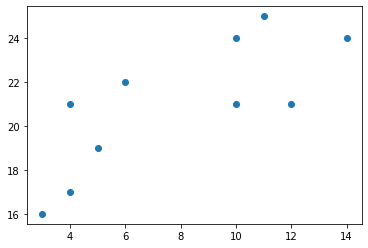

In [29]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

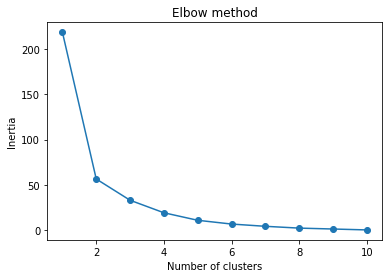

In [30]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

The elbow method shows that 2 is the good value for K, hence we chose 2 as the number for K and display the result accordingly.

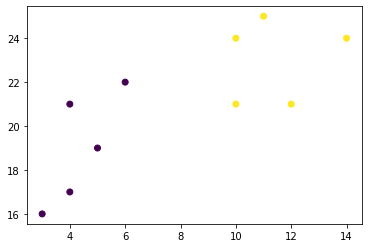

In [31]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show() 

#Programming Project 3

Develop a demonstration for a multiclass classifier built from several binary classifiers.   

**What is Classification ?**

Classification is a form of data analysis that extracts models describing important data classes.
Such models, called classifiers, predict categorical (discrete, unordered) class labels. For
example, we can build a classification model to categorize bank loan applications as either
safe or risky. Such analysis can help provide us with a better understanding of the data at
large.

A medical researcher wants to analyze breast cancer data to predict which one of three
specific treatments a patient should receive. The data analysis
task is classification, where a model or classifier is constructed to predict class (categor-
ical) labels, such as “yes” or “no” for the
marketing data; or “treatment A,” “treatment B,” or “treatment C” for the medical data. This type of classification is binary classification. Binary classification uses some algorithms to do the task, some of the most common algorithms used by binary classification are

1) Logistic Regression

2) k-Nearest Neighbors

3) Decision Trees

4) Support Vector Machine

5) Naive Bayes

Some classification algorithms, such as support vector machines, are designed for binary
classification. We extend these algorithms to allow for multiclass classification
(i.e., classification involving more than two classes)

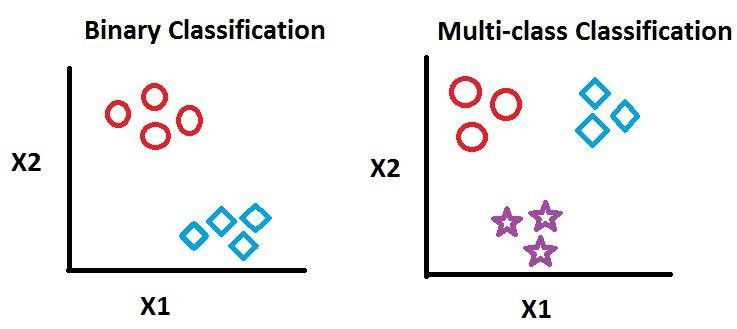

A simple approach is one-versus-all (OVA). Given m classes, we train m binary clas-
sifiers, one for each class. Classifier j is trained using tuples of class j as the positive class,
and the remaining tuples as the negative class. It learns to return a positive value for class
j and a negative value for the rest. To classify an unknown tuple, X, the set of classifiers
vote as an ensemble. For example, if classifier j predicts the positive class for X, then
class j gets one vote. If it predicts the negative class for X, then each of the classes except
j gets one vote. The class with the most votes is assigned to X.

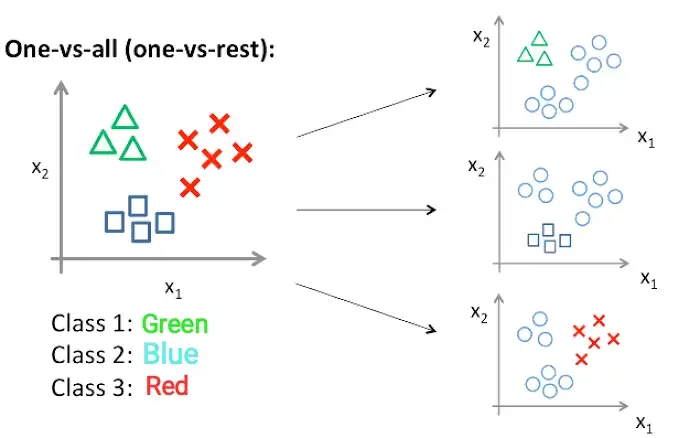

The Iris flower data set consists of 3 classes which are the types of iris flowers (I.e, iris setosa , iris virginica and iris Versicolor ) which contains 50 instances each, which we classify by binary classification into 3 separate classes successfully . Here we classified the **multiclass** data by using binary classification by building a **multiclass classifier** using **binary classifiers.(SVC)**

In [32]:
#In this example, we are going to see how we can implement a support vector classifier for the multiclass classification of IRIS data using the OneVsRestClassifier. Let’s import libraries first.

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

#get data from iris

iris = datasets.load_iris()
X = iris.data
y = iris.target

svc = SVC()

o_vs_r = OneVsRestClassifier(svc)

#Train the model

o_vs_r.fit(X, y)

#Predicting values from the model. 

output= o_vs_r.predict(X)
output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Here in the above, we can see that the support vector classifier is predicting 3 classes**

All-versus-all (AVA) is an alternative approach that learns a classifier for each pair
of classes. Given m classes, we construct m(m−1)
2 binary classifiers. A classifier is trained using tuples of the two classes it should discriminate. To classify an unknown tuple,
each classifier votes. The tuple is assigned the class with the maximum number of votes.
All-versus-all tends to be superior to one-versus-all.

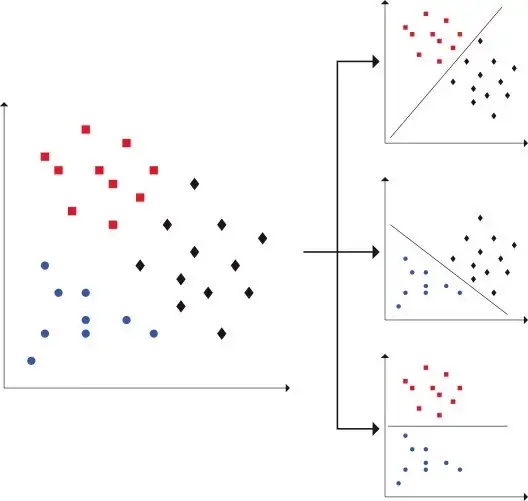

In [33]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

#get the data.

iris = datasets.load_iris()
X = iris.data
y = iris.target

#Implement support vector classifier 

svc = SVC()

#Implementing One-Vs-One method

o_vs_o = OneVsOneClassifier(svc)

#Training the model

o_vs_o.fit(X, y)

#Predicting from model

output1 = o_vs_o.predict(X)
output1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Here we can see our support vector classifier can predict more than two classes using the One-vs-One method. 